<a href="https://colab.research.google.com/github/SelviTriJayanti99/VISUALISASI/blob/main/Selvi%20Tri%20Jayanti_Visualisasi_Data_Matplotlib%2C_Seaborn%2C_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1. PLOTLY


import plotly.express as px
import pandas as pd

url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# kita ubah format datanya dari lebar (wide) ke panjang (long) agar mudah dipakai
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

fig = px.treemap(
    df_long,
    path=[px.Constant("Penjualan Per Orang"), "nama", "bulan"],
    values="penjualan",
    color="penjualan",
    hover_data=["bulan", "penjualan"]
)

fig.show()


In [3]:
import plotly.express as px
import pandas as pd

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Ubah data ke format long
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

# Biar urutan bulan rapi
bulan_order = ["jan", "feb", "mar", "apr"]
df_long["bulan"] = pd.Categorical(df_long["bulan"], categories=bulan_order, ordered=True)

# Bikin line chart
fig = px.line(
    df_long,
    x="bulan",
    y="penjualan",
    color="nama",             # tiap orang punya warna sendiri
    line_group="nama",
    hover_name="nama",
    line_shape="spline",
    render_mode="svg"
)

fig.show()


In [4]:
import plotly.express as px
import pandas as pd

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Ubah ke format long
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

# Histogram distribusi penjualan tiap bulan
fig = px.histogram(
    df_long,
    x="penjualan",          # nilai numerik yang diplot
    color="bulan",          # warna dibedakan per bulan
    marginal="rug",         # tambahkan rug plot
    hover_data=["nama", "bulan", "penjualan"]
)

fig.show()


In [5]:
import plotly.express as px
import pandas as pd

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Density contour: jan vs feb
fig = px.density_contour(
    df,
    x="jan",
    y="feb",
    color="nama",   # bisa dibedakan per orang, opsional
    marginal_x="histogram",
    marginal_y="histogram"
)

fig.show()


In [7]:
import plotly.express as px
import pandas as pd

url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Tambahkan data lokasi fiktif (misalnya tiap orang = kota)
lokasi = {
    "Andi": (-6.2, 106.8),   # Jakarta
    "Budi": (-7.8, 110.4),   # Yogyakarta
    "Chandra": (-6.9, 107.6),# Bandung
    "Dudi": (-5.1, 119.4),   # Makassar
    "Eko": (-3.3, 114.6),    # Banjarmasin
    "Fahri": (0.5, 101.4),   # Pekanbaru
    "Gina": (-8.6, 116.1),   # Lombok
    "Herman": (-2.9, 104.7), # Palembang
    "Indara": (3.6, 98.7),   # Medan
    "Joni": (-10.2, 123.6)   # Kupang
}

df["lat"] = df["nama"].map(lambda x: lokasi[x][0])
df["lon"] = df["nama"].map(lambda x: lokasi[x][1])
df["total"] = df[["jan","feb","mar","apr"]].sum(axis=1)

fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    size="total",                # ukuran = total penjualan
    color="total",               # warna = total penjualan
    hover_name="nama",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=20,
    zoom=4,
    mapbox_style="carto-positron"
)

fig.show()

In [8]:
import plotly.express as px
import pandas as pd

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Ubah ke format long (biar bulan jadi baris)
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

# Sunburst chart
fig = px.sunburst(
    df_long,
    path=[px.Constant("Penjualan"), "nama", "bulan"],  # hierarki: root → nama → bulan
    values="penjualan",
    color="penjualan",
    hover_data=["bulan", "penjualan"]
)

fig.show()

In [9]:
import plotly.express as px
import pandas as pd

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Hitung total penjualan per orang
df["total"] = df[["jan", "feb", "mar", "apr"]].sum(axis=1)

# Kalau mau gabungkan yang kecil jadi "Lainnya"
df.loc[df["total"] < 400, "nama"] = "Lainnya"

# Pie chart
fig = px.pie(
    df,
    values="total",
    names="nama",
    title="Proporsi Total Penjualan per Orang"
)

fig.show()


In [10]:
import plotly.express as px
import pandas as pd

# Baca data penjualan
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Ubah format wide -> long
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

# Biar urutan bulan benar
bulan_order = ["jan", "feb", "mar", "apr"]
df_long["bulan"] = pd.Categorical(df_long["bulan"], categories=bulan_order, ordered=True)

# Line chart penjualan tiap orang
fig = px.line(
    df_long,
    x="bulan",
    y="penjualan",
    color="nama",
    line_group="nama",
    hover_name="nama",
    line_shape="spline",
    render_mode="svg",
    title="Perkembangan Penjualan per Orang"
)

fig.show()


In [11]:
import plotly.express as px
import pandas as pd

# Baca data penjualan
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Ubah ke format long
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

# Biar urutan bulan rapi
bulan_order = ["jan", "feb", "mar", "apr"]
df_long["bulan"] = pd.Categorical(df_long["bulan"], categories=bulan_order, ordered=True)

# Area chart: penjualan tiap orang (stacked)
fig = px.area(
    df_long,
    x="bulan",
    y="penjualan",
    color="nama",
    line_group="nama",
    title="Perkembangan Penjualan per Bulan (Stacked Area)"
)

fig.show()


In [ ]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_map(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           map_style="carto-positron", zoom=9)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent", hover_name="country", size="pop",
               animation_frame="year", projection="natural earth")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig.show()

In [12]:
import plotly.express as px
import pandas as pd

# Baca data penjualan
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Hitung total penjualan semua bulan
df["total"] = df[["jan", "feb", "mar", "apr"]].sum(axis=1)

# Bubble chart
fig = px.scatter(
    df,
    x="jan",
    y="feb",
    size="total",
    color="nama",
    hover_name="nama",
    size_max=60,
    title="Perbandingan Penjualan Januari vs Februari"
)

fig.show()


In [ ]:
import plotly.express as px
df = px.data.wind()
fig = px.scatter_polar(df, r="frequency", theta="direction", color="strength", symbol="strength",
            color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [13]:
import plotly.express as px
import pandas as pd

# Baca data penjualan
url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# Hitung total penjualan semua bulan
df["total"] = df[["jan", "feb", "mar", "apr"]].sum(axis=1)

# Scatter 3D
fig = px.scatter_3d(
    df,
    x="jan",
    y="feb",
    z="mar",
    color="nama",
    size="total",
    hover_name="nama",
    size_max=20,
    title="Scatter 3D Penjualan (Jan, Feb, Mar)"
)

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "X": [1, 2, 3, 4, 5],
    "Y": [5, 15, 25, 35, 45]
})

fig = px.scatter(df, x="X", y="Y", size="Y", color="Y",
                 color_continuous_scale=px.colors.sequential.Pinkyl,
                 title="")
fig.show()


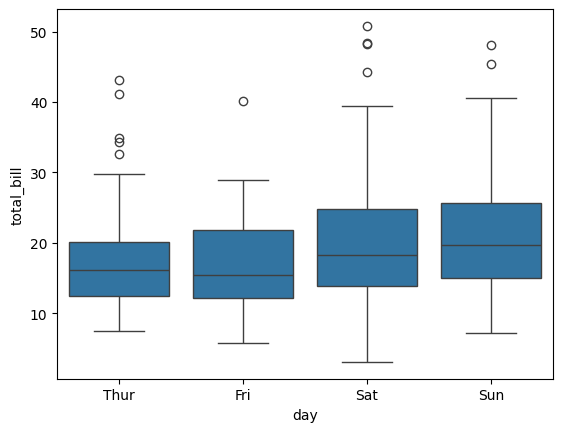

In [ ]:
sns.boxplot(x=tips["day"], y=tips["total_bill"])  # Box plot by day
plt.show()

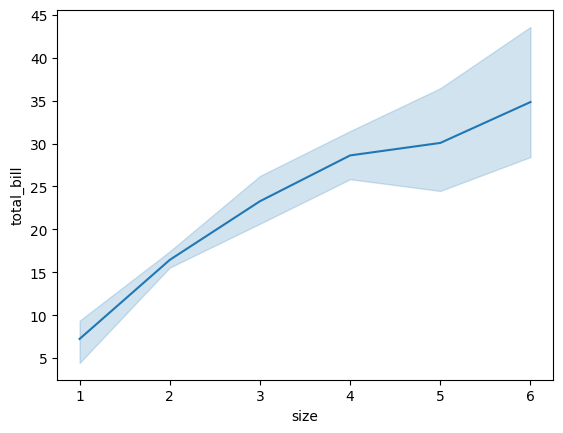

In [ ]:
sns.lineplot(x="size", y="total_bill", data=tips)  # Line plot for group size vs. bill
plt.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
df["e"] = df["sepal_width"]/100
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", error_x="e", error_y="e")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.medals_long()

fig = px.bar(df, x="medal", y="count", color="nation",
            pattern_shape="nation", pattern_shape_sequence=[".","x", "+"])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

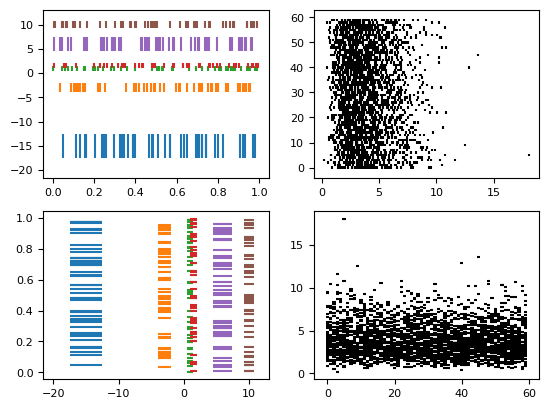

In [ ]:
#2. MATLOTLIB
import matplotlib.pyplot as plt
import numpy as np

import matplotlib

matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = [f'C{i}' for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()

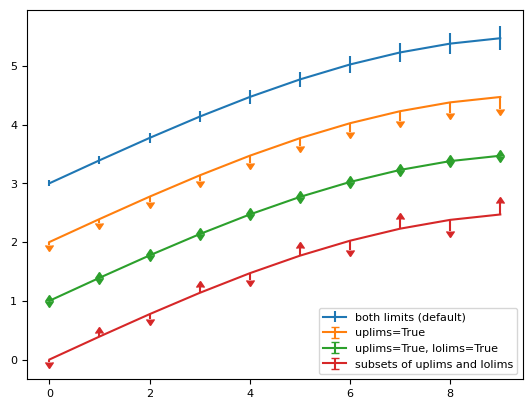

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

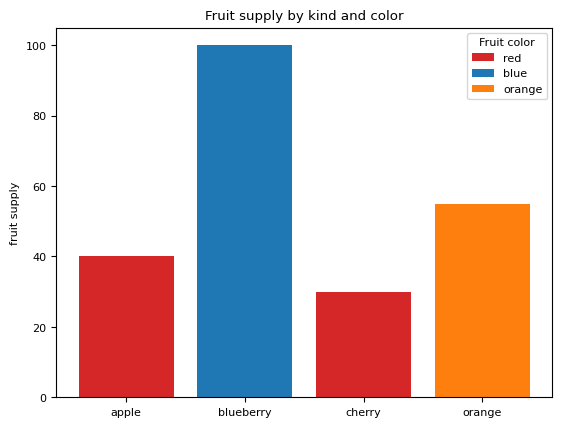

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

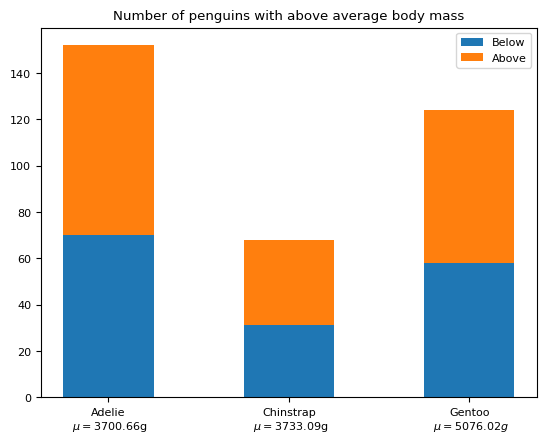

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

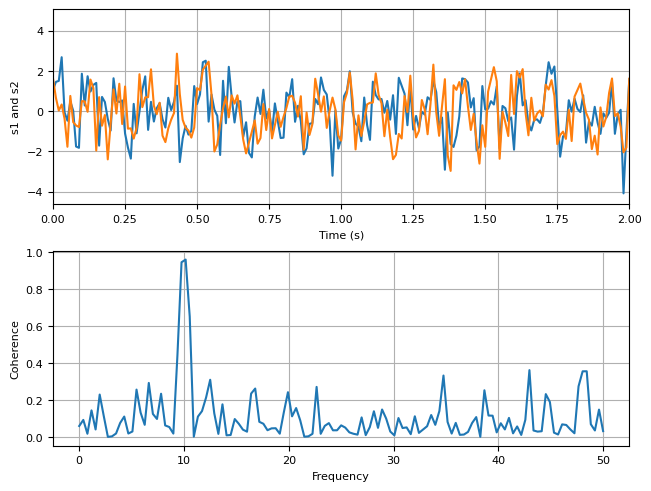

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, NFFT=256, Fs=1. / dt)
axs[1].set_ylabel('Coherence')

plt.show()

[None]

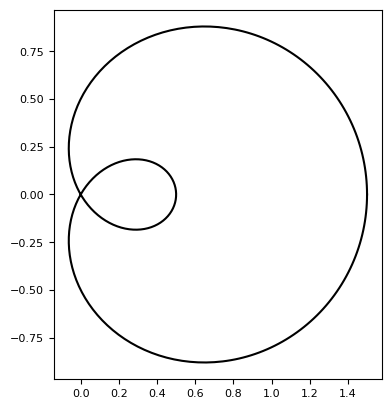

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import PathPatch
from matplotlib.path import Path

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect=1)

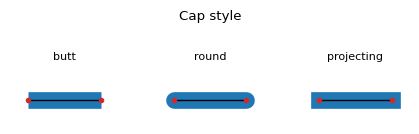

In [ ]:
import matplotlib.pyplot as plt

from matplotlib._enums import CapStyle

CapStyle.demo()
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

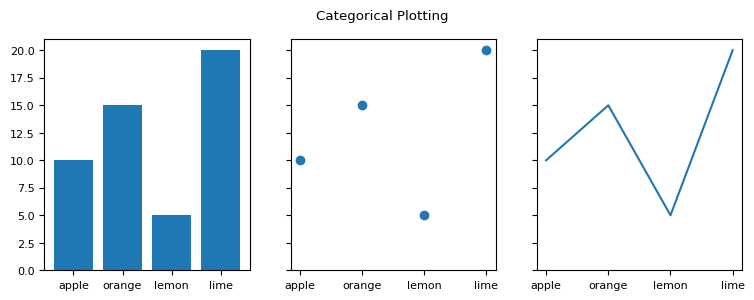

In [ ]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

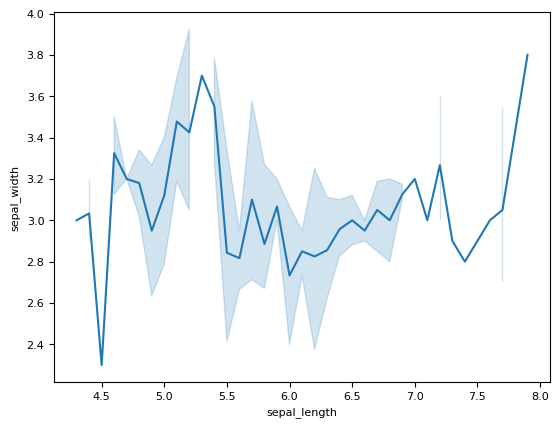

In [ ]:
#3.SEABORN
# importing packages
import seaborn as sns

# loading dataset
data = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

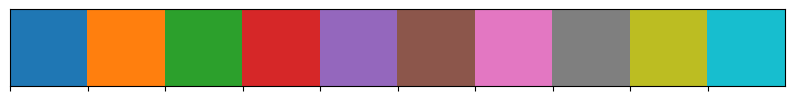

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette()
sns.palplot(palette)
plt.show()

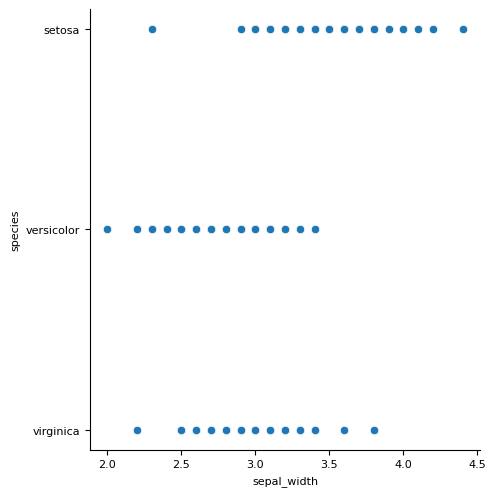

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

# creating the relplot
sns.relplot(x='sepal_width', y='species', data=data)

plt.show()

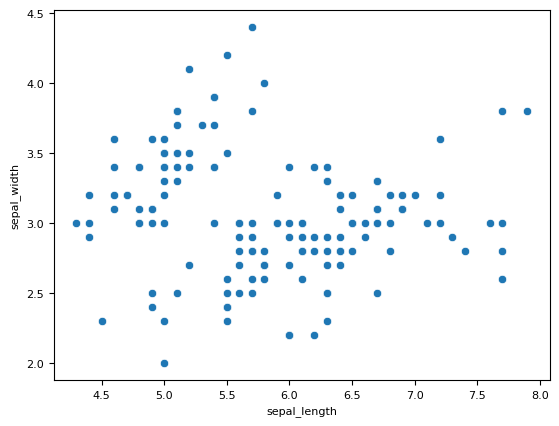

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.scatterplot(x='sepal_length', y='sepal_width', data=data)
plt.show()

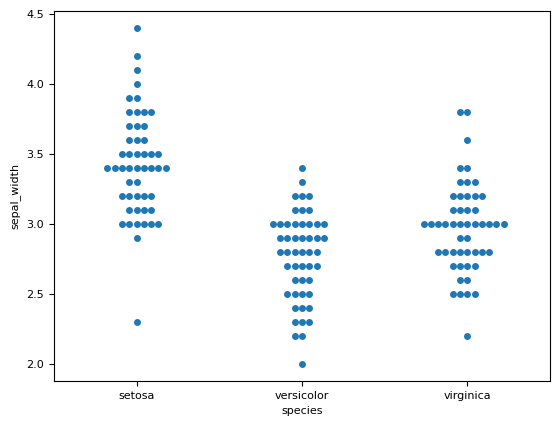

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.swarmplot(x='species', y='sepal_width', data=data)
plt.show()

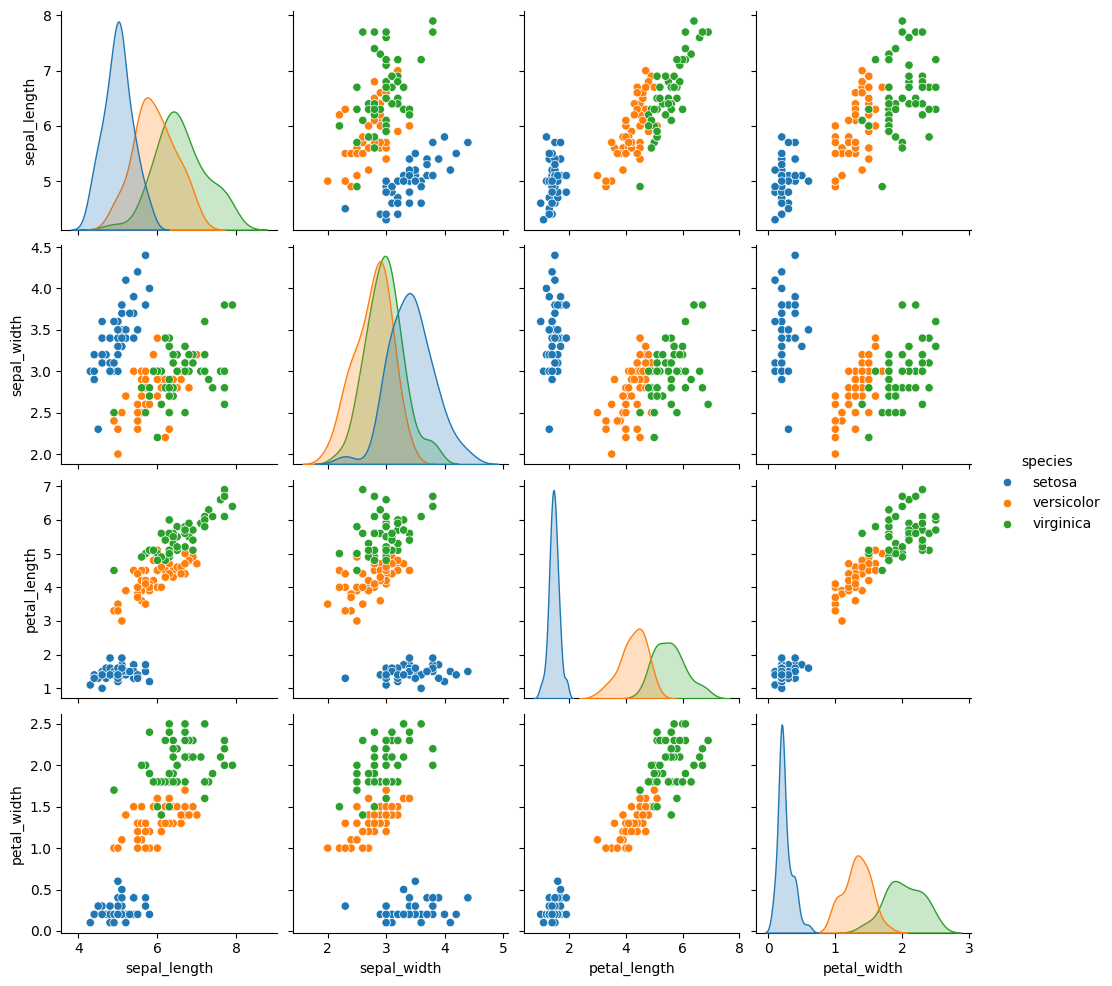

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.pairplot(data=data, hue='species')
plt.show()

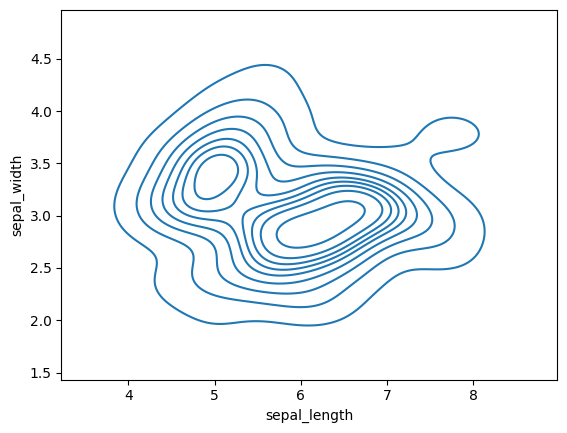

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.kdeplot(x='sepal_length', y='sepal_width', data=data)
plt.show()

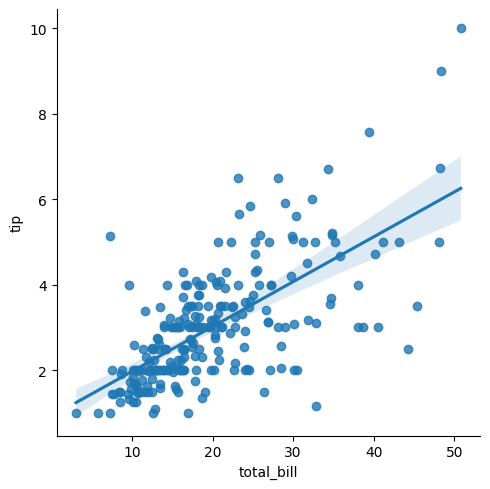

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("tips")

sns.lmplot(x='total_bill', y='tip', data=data)
plt.show()

<Axes: xlabel='timepoint', ylabel='signal'>

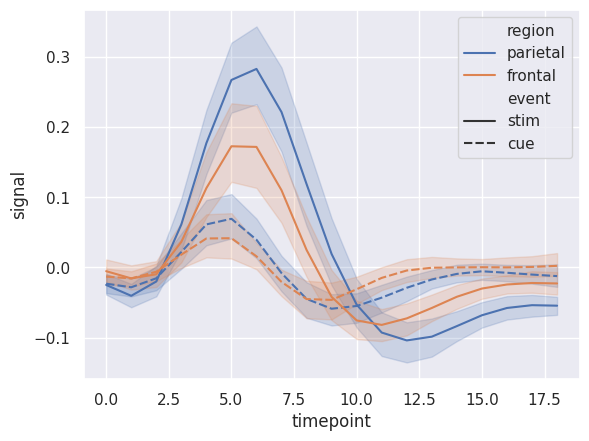

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

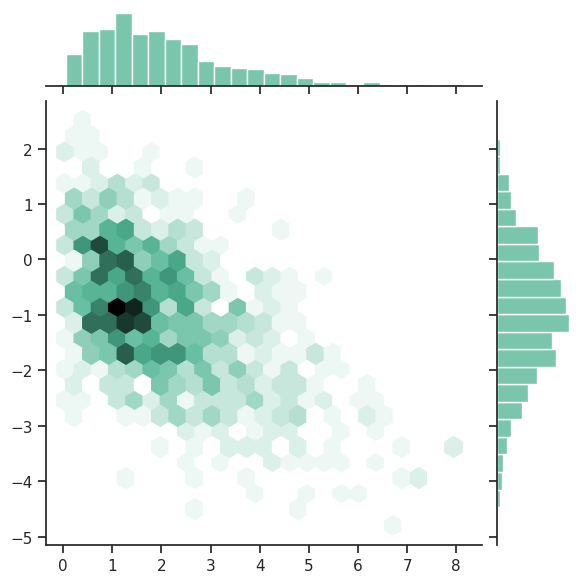

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

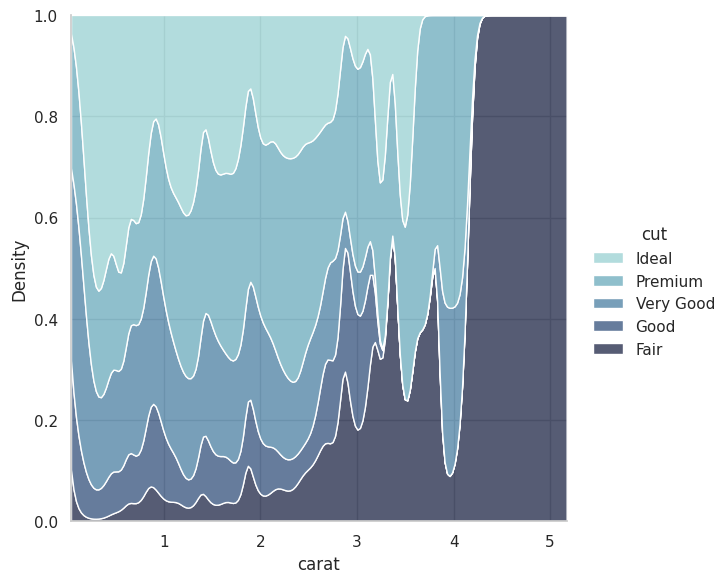

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

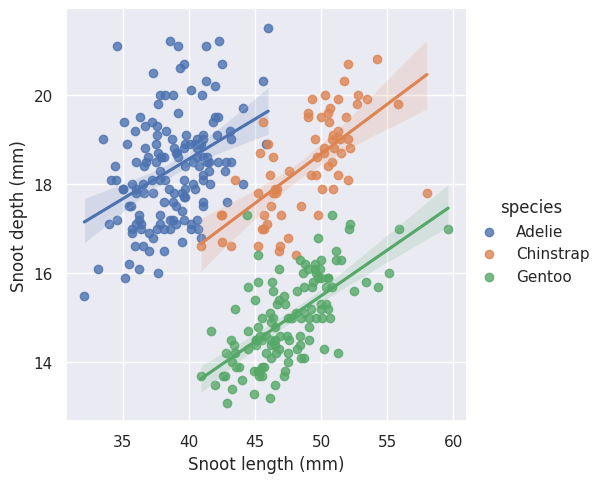

In [ ]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

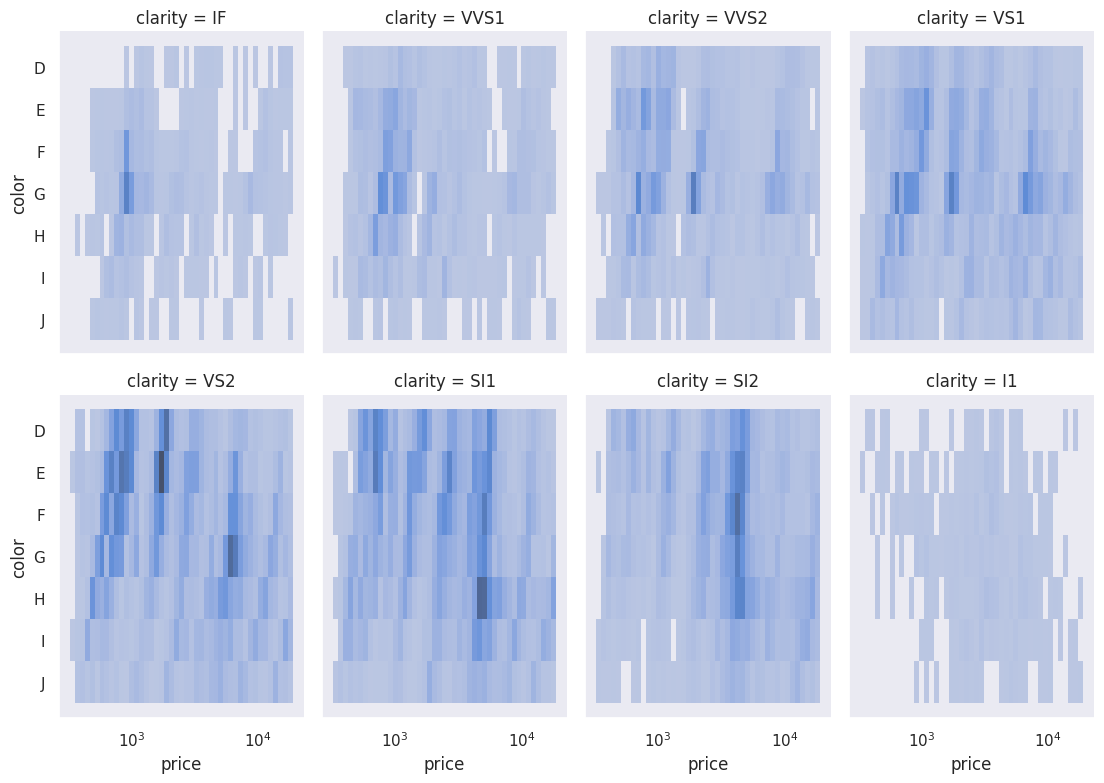

In [ ]:
import seaborn as sns
sns.set_theme(style="dark")

diamonds = sns.load_dataset("diamonds")
sns.displot(
    data=diamonds, x="price", y="color", col="clarity",
    log_scale=(True, False), col_wrap=4, height=4, aspect=.7,
)

In [1]:
import plotly.express as px
import pandas as pd

url = "https://raw.githubusercontent.com/Alam-A99/Pandas_Latih/10ebb3af000e930a44989075733f495d5c2f4be5/penjualan.csv"
df = pd.read_csv(url)

# kita ubah format datanya dari lebar (wide) ke panjang (long) agar mudah dipakai
df_long = df.melt(id_vars=["nama"], var_name="bulan", value_name="penjualan")

fig = px.treemap(
    df_long,
    path=[px.Constant("Penjualan Per Orang"), "nama", "bulan"],
    values="penjualan",
    color="penjualan",
    hover_data=["bulan", "penjualan"]
)

fig.show()
